In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator


In [2]:
# data preparation
dataset_dir =  r'D:\Project\Deep Learning - Research\programs\MV-couswork\Brain Tumor Data Set\BrainTumorProcessed'
input_shape = (256, 256, 3)
batch_size = 4
num_classes = 2

In [3]:
# data augumentation
train_datagen = ImageDataGenerator(
rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_datagen = ImageDataGenerator(
rescale = 1./255
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'train'),
    target_size = input_shape[:2],
    batch_size = batch_size,
    class_mode = 'binary'
)

# validation_generator = train_datagen.flow_from_directory(
#     os.path.join(dataset_dir, 'train'),
#     target_size = input_shape[:2],
#     batch_size = batch_size,
#     class_mode = 'binary'
# )

test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_dir, 'test'),
    target_size = input_shape[:2],
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 3103 images belonging to 2 classes.
Found 666 images belonging to 2 classes.


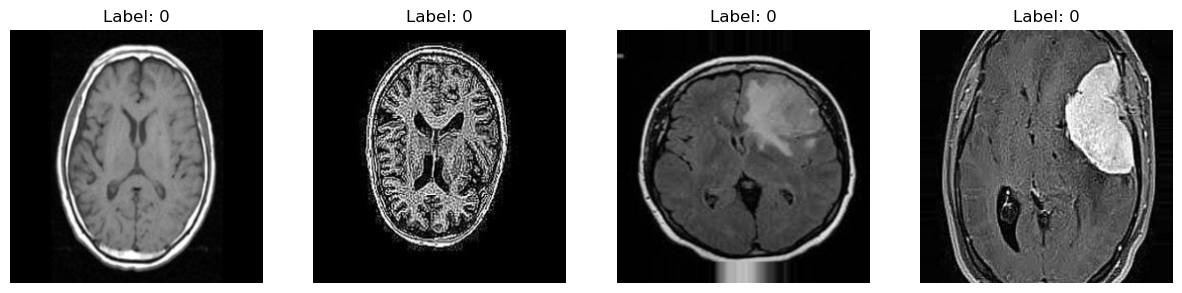

In [5]:
# get img from generator
images, labels = next(train_generator)

# show the img
fig, axes = plt.subplots(1, batch_size, figsize=(15, 5))
for i in range(batch_size):
    axes[i].imshow(images[i])
    axes[i].set_title(f'Label: {np.argmax(labels[i])}')  # show label
    axes[i].axis('off')
plt.show()

In [6]:
# building the model

model = Sequential()

# Convolutional layers VGG16
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


# Flatten the layers
model.add(Flatten())

# Add fully conected layers
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=4096, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid')) # third FC

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                    

In [8]:

model.compile(loss='binary_crossentropy', optimizer='adaGrad', metrics=['accuracy'])

In [9]:
history = model.fit(train_generator, epochs=100, validation_data =(test_generator), verbose=1)

Epoch 1/100
776/776 [==============================] - 55s 67ms/step - loss: 0.6921 - accuracy: 0.5259 - val_loss: 0.6912 - val_accuracy: 0.5315
Epoch 2/100
776/776 [==============================] - 41s 52ms/step - loss: 0.6911 - accuracy: 0.5321 - val_loss: 0.6904 - val_accuracy: 0.5315
Epoch 3/100
776/776 [==============================] - 41s 52ms/step - loss: 0.6906 - accuracy: 0.5321 - val_loss: 0.6896 - val_accuracy: 0.5315
Epoch 4/100
776/776 [==============================] - 41s 53ms/step - loss: 0.6899 - accuracy: 0.5321 - val_loss: 0.6885 - val_accuracy: 0.5315
Epoch 5/100
776/776 [==============================] - 41s 52ms/step - loss: 0.6889 - accuracy: 0.5321 - val_loss: 0.6864 - val_accuracy: 0.5315
Epoch 6/100
776/776 [==============================] - 41s 53ms/step - loss: 0.6859 - accuracy: 0.5337 - val_loss: 0.6794 - val_accuracy: 0.5616
Epoch 7/100
776/776 [==============================] - 41s 53ms/step - loss: 0.6766 - accuracy: 0.5904 - val_loss: 0.6507 - val_ac

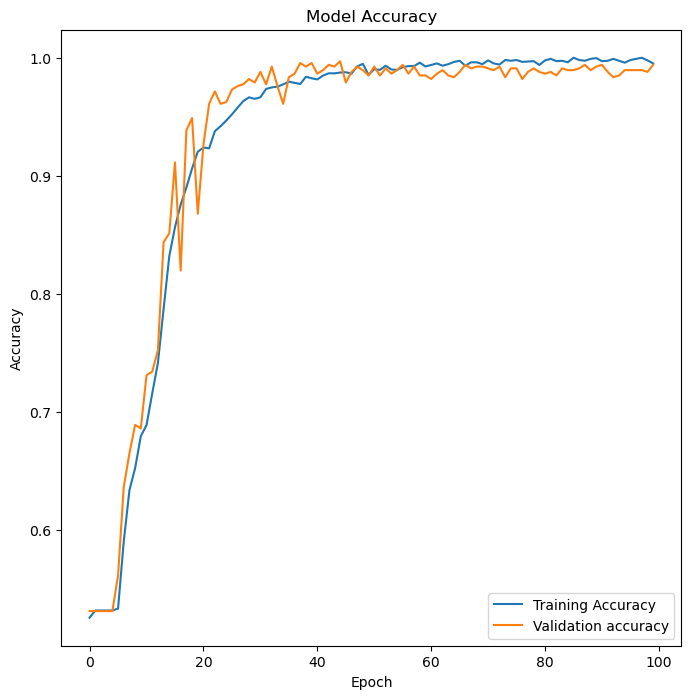

In [10]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation accuracy'], loc='lower right')

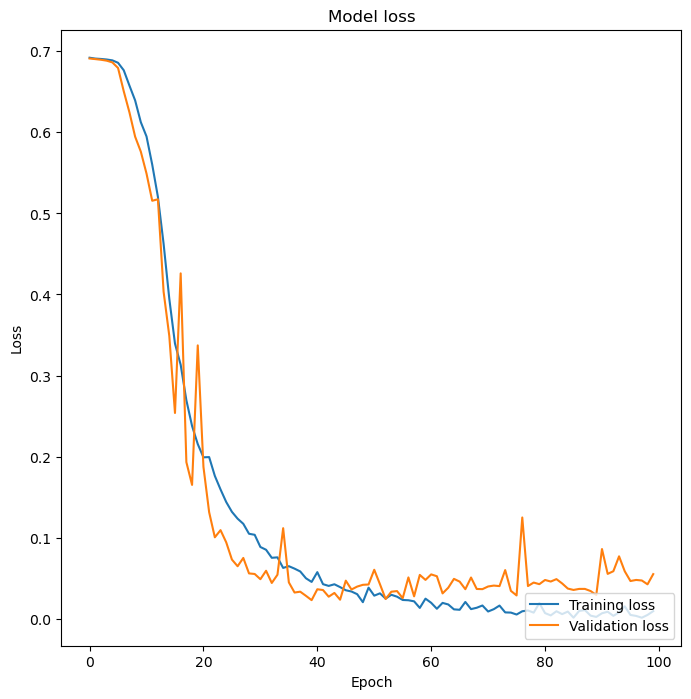

In [11]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='lower right')
plt.show()

In [12]:
loss, accurancy = model.evaluate(test_generator)
print('Test loss:', loss)
print("Test accurancy", accurancy)

167/167 [==============================] - 2s 14ms/step - loss: 0.0550 - accuracy: 0.9940
Test loss: 0.054979387670755386
Test accurancy 0.9939939975738525


In [13]:
#Compute confusion matrix
from sklearn.metrics import confusion_matrix

#Generate predictions for the test dataset
y_pred = model.predict(test_generator)
y_pred_labels = (y_pred>0.5).astype(int)

#Get the true labels from thee test generator
y_true = test_generator.classes

#compute the confusion matrix
confusion = confusion_matrix(y_true, y_pred_labels)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[198 156]
 [160 152]]


In [14]:
#compute f1-score
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred_labels)
print('F1-score:', f1)

F1-score: 0.49032258064516127


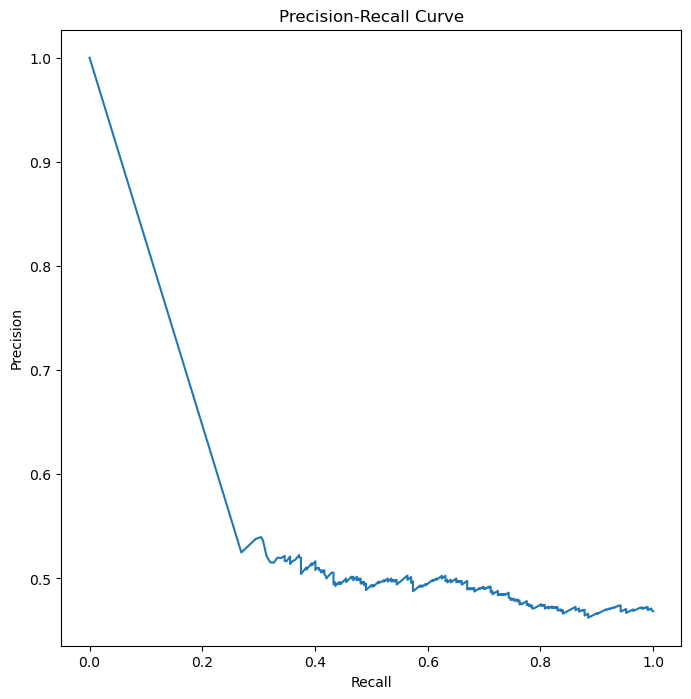

In [15]:
#compute precision-recall score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

#compute precision, recall(sensitivity), and threshold values
precision, recall, thresholds = precision_recall_curve(y_true, y_pred)

#plot the precision-recall curve
plt.figure(figsize=(8,8))
plt.plot(recall, precision)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

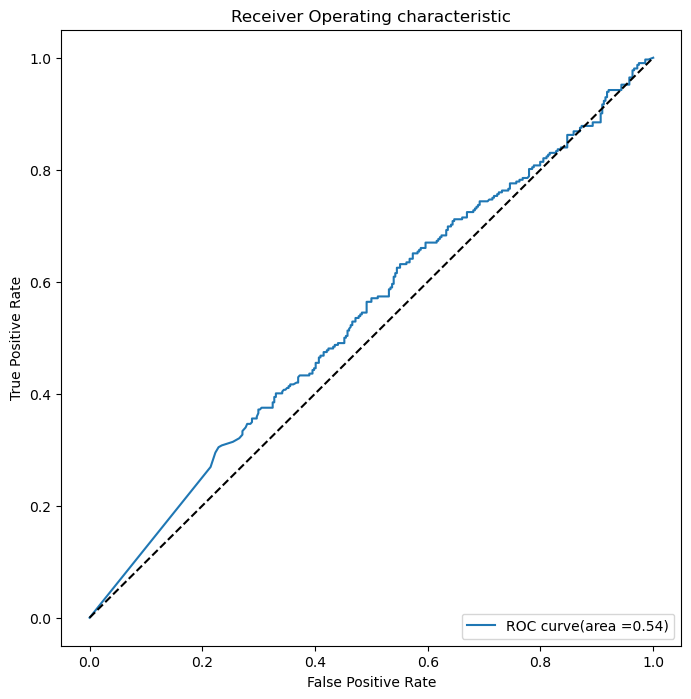

In [16]:
#compute precision-recall score
from sklearn.metrics import roc_curve, auc

#compute precision, recall(sensitivity), and threshold values
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

#compute the AUC score
roc_auc= auc(fpr, tpr)

#plot the precision-recall curve
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, label= 'ROC curve(area =%0.2f)' %roc_auc)
plt.plot([0, 1], [0,1], 'k--')
plt.title('Receiver Operating characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [17]:
#compute sensitivity and specificity
sensitivity=tpr[1] #True positive rate 
specificity= 1-fpr[1]

print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 0.2692307692307692
specificity: 0.7853107344632768
